# Testing forward propagation
- [x] Dimensions for weights and biases are correctly created
- [x] The output shapes for each layer are correct

In [1]:
from neural_network import NeuralNetwork
import numpy as np
l1 = (64, 'relu')
l2 = (32, 'relu')
l3 = (16, 'relu')
l4 = (10, 'softmax')

num_inputs1 = 784
layers1 = [l1, l2, l3, l4]

nn1 = NeuralNetwork(num_inputs1, layers1)
nn1.summary()

inputs: 784 - neurons: 64
weights: (784, 64) - biases: (64,)

inputs: 64 - neurons: 32
weights: (64, 32) - biases: (32,)

inputs: 32 - neurons: 16
weights: (32, 16) - biases: (16,)

inputs: 16 - neurons: 10
weights: (16, 10) - biases: (10,)



In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_norm = x_train / 255.0
x_train_norm = x_train_norm.reshape(x_train_norm.shape[0], -1)

print(x_train_norm.shape)

(60000, 784)


In [3]:
nn1.forward_prop(x_train_norm)

layer 1 output: (60000, 64)
layer 2 output: (60000, 32)
layer 3 output: (60000, 16)
layer 4 output: (60000, 10)


## Testing with pre trained weights
- [x] Forward propagation result of Tensorflow model and Custom Neural Network is same

In [1]:
def create_confusion_matrix(pred, true, title):
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(pred, true, normalize='true')
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='PuBu')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)

    plt.show()

In [2]:
import tensorflow as tf
from tensorflow.keras import models

pre_defined_model = models.load_model("./models/tf_model.h5")
print(pre_defined_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,020 (207.11 KB)

 Trainable params: 53,018 (207.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


creating identical custom neural network

In [3]:
from neural_network import NeuralNetwork
import numpy as np
l1 = (64, 'relu')
l2 = (32, 'relu')
l3 = (16, 'relu')
l4 = (10, 'softmax')

num_inputs2 = 784
layers2 = [l1, l2, l3, l4]

nn2 = NeuralNetwork(num_inputs2, layers2)

setting the pre-trained weights to custom NN

In [4]:
for i, layer in enumerate(pre_defined_model.layers):
    weight, bias = layer.get_weights()
    nn2.layers[i].weight = weight
    nn2.layers[i].bias = bias

In [5]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_norm = x_train / 255.0
x_train_norm = x_train_norm.reshape(x_train_norm.shape[0], -1)

x_test_norm = x_test / 255.0
x_test_norm = x_test_norm.reshape(x_test_norm.shape[0], -1)

x_data = x_test_norm
y_data = y_test

Forward propagating on mnist dataset

In [6]:
pred = nn2.forward_prop(x_data)
print(pred.shape)

(10000, 10)


In [7]:
pred_ = np.argmax(pred, axis=1)

print(pred_.shape)
print(y_data.shape)

(10000,)
(10000,)


In [8]:
pred_tf = pre_defined_model.predict(x_data)
pred_tf_ = np.argmax(pred_tf, axis=1)
print(pred_tf.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step
(10000, 10)


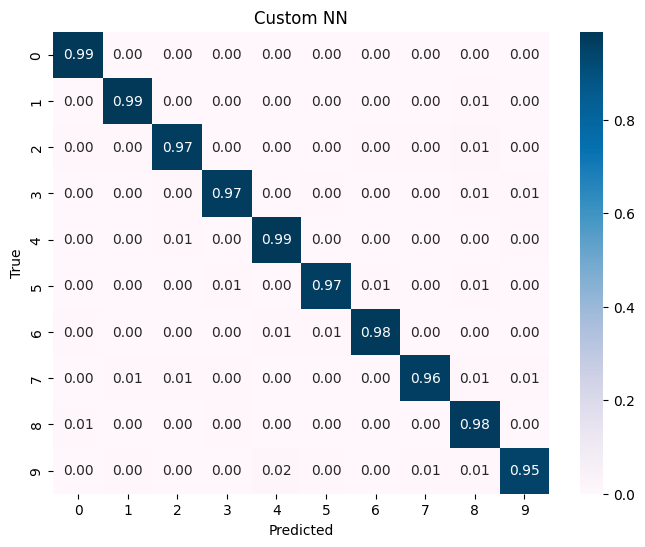

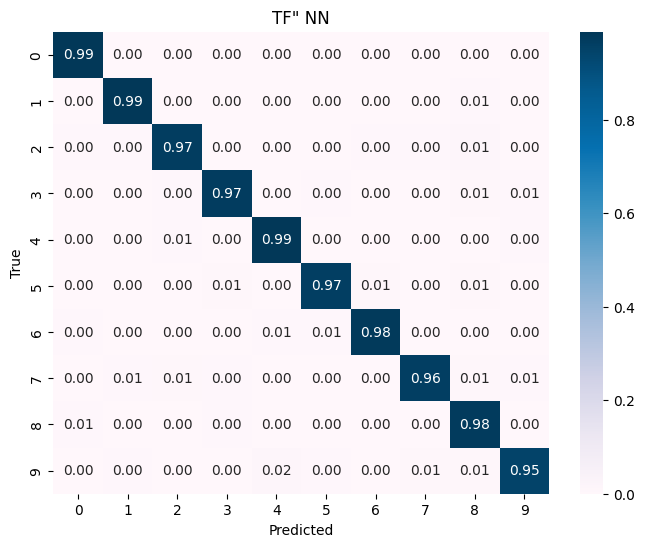

In [9]:
plt1 = create_confusion_matrix(y_data, pred_, 'Custom NN')
plt2 = create_confusion_matrix(y_data, pred_tf_, 'TF" NN')

# Softmax function

In [11]:
z_ = nn2.layers[-1].z
print(z_.shape)
print()

exp_z = np.exp(z_)
print(exp_z.shape)
print()

print(np.sum(exp_z, axis=1).shape)
print()

sum_ = np.expand_dims(np.sum(exp_z, axis=1), axis=-1)
print(sum_.shape)
print()

sum_ = np.sum(exp_z, axis=1, keepdims=True)
print(sum_.shape)
print()

softmaxZ = exp_z / sum_
print(softmaxZ.shape)

(10000, 10)

(10000, 10)

(10000,)

(10000, 1)

(10000, 1)

(10000, 10)
